<p align="right">
    <img src="Zewail-City.png">
</p>


---

# Experiment (VI): Observation of the the nearst open star cluster (Hyades)


In [2]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Introducing the Data
data_path = 'Hyades_data.xlsx'
#Transform Data to DataFrame
df = pd.read_excel(data_path)
#Display
df.head()

,Hipparcos catalogue number,"α, J1991.25 (h m s)","δ, J1991.25 ( 0 ` ``)",μα cos δ (10-3 arsec year -1 ),μα cos δ error,μδ (10-3 arsec year -1 ),μδ error,vr (km sec -1),vr error,p (10-3 arcsec),p error
0,18170,03 53 09.96,+17 19 37.8,143.97,1.06,-29.93,0.84,35.0,2.5,24.14,0.90
1,19554,04 11 20.20,+05 31 22.9,146.86,1.00,5.00,0.85,36.6,1.2,25.89,0.95
2,20261,04 20 36.24,+15 05 43.8,108.79,0.95,-20.67,0.82,36.2,1.2,21.20,0.99
3,20901,04 28 50.10,+13 02 51.5,105.17,0.84,-15.08,0.63,39.9,4.1,20.33,0.84
4,21589,04 38 09.40,+12 30 39.1,101.73,0.96,-14.90,0.76,44.7,5.0,21.79,0.79


In [4]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hipparcos catalogue number      8 non-null      int64  
 1   α, J1991.25 (h m s)             8 non-null      object 
 2   δ, J1991.25 ( 0  `   ``)        8 non-null      object 
 3   μα cos δ (10-3 arsec year -1 )  8 non-null      float64
 4   μα cos δ error                  8 non-null      float64
 5   μδ (10-3 arsec year -1 )        8 non-null      float64
 6   μδ error                        8 non-null      float64
 7   vr (km sec -1)                  8 non-null      float64
 8   vr error                        8 non-null      float64
 9   p (10-3 arcsec)                 8 non-null      float64
 10  p error                         8 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 836.0+ bytes


In [5]:
#Helper Functions

# Function to convert h m s to degrees
def ra_to_degrees(ra_hms):
    h, m, s = map(float, ra_hms.split())
    return 15 * (h + m / 60 + s / 3600)
    
# Function to convert 0  `   `` to decimal
def declination_to_decimal(decl):
    sign = -1 if decl.startswith("-") else 1
    parts = decl.replace("+", "").replace("-", "").split()
    degrees, minutes, seconds = map(float, parts)
    decimal_degrees = sign * (degrees + minutes / 60 + seconds / 3600)
    return decimal_degrees

## (a) Determination of the Convergence Point:

### Units Conversions:

In [8]:
# Apply the conversion
df["δ, J1991.25 ( 0  `   ``)"] = df["δ, J1991.25 ( 0  `   ``)"].apply(declination_to_decimal)
# Apply the conversion function
df["α, J1991.25 (h m s)"] = df["α, J1991.25 (h m s)"].apply(ra_to_degrees)

df.rename(columns={"δ, J1991.25 ( 0  `   ``)": "δ (deg)", "α, J1991.25 (h m s)": "α (deg)"}, inplace=True)

df_columns = df.columns.tolist()  # Get column names as a list

for i in range(3, len(df_columns)):
    # Convert proper motion from milliarcseconds to degrees
    if i != 7 and i != 8:  # Ensure correct condition syntax
        df[df_columns[i]] /= 3600000  # Convert milliarcseconds to degrees
        
df.rename(columns={"μα cos δ (10-3 arsec year -1 )": "μα cos δ (deg year -1)", 
                   "μδ (10-3 arsec year -1 )": "μδ (deg year -1)",
                   "μα cos δ error": "Δμα cos δ", "μδ error " :"Δμδ",
                   "vr error": "Δvr", "p error": "Δp",
                   "p (10-3 arcsec)": "p (deg)"}, inplace=True)
df.head()

,Hipparcos catalogue number,α (deg),δ (deg),μα cos δ (deg year -1),Δμα cos δ,μδ (deg year -1),Δμδ,vr (km sec -1),Δvr,p (deg),Δp
0,18170,58.291500,17.327167,0.000040,2.944444e-07,-0.000008,2.333333e-07,35.0,2.5,0.000007,2.500000e-07
1,19554,62.834167,5.523028,0.000041,2.777778e-07,0.000001,2.361111e-07,36.6,1.2,0.000007,2.638889e-07
2,20261,65.151000,15.095500,0.000030,2.638889e-07,-0.000006,2.277778e-07,36.2,1.2,0.000006,2.750000e-07
3,20901,67.208750,13.047639,0.000029,2.333333e-07,-0.000004,1.750000e-07,39.9,4.1,0.000006,2.333333e-07
4,21589,69.539167,12.510861,0.000028,2.666667e-07,-0.000004,2.111111e-07,44.7,5.0,0.000006,2.194444e-07


In [9]:
# Display statsics of the Dataframe
df.describe(include='all')

,Hipparcos catalogue number,α (deg),δ (deg),μα cos δ (deg year -1),Δμα cos δ,μδ (deg year -1),Δμδ,vr (km sec -1),Δvr,p (deg),Δp
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00
mean,21268.500000,68.467896,15.603809,0.000028,2.777778e-07,-0.000006,2.076389e-07,39.787500,2.150000,0.000006,2.618056e-07
std,1968.100607,6.459802,6.828588,0.000010,4.888528e-08,0.000006,3.190560e-08,3.959595,1.608016,0.000001,4.373819e-08
min,18170.000000,58.291500,5.523028,0.000016,2.083333e-07,-0.000017,1.444444e-07,35.000000,0.500000,0.000003,2.194444e-07
25%,20084.250000,64.571792,12.309549,0.000019,2.562500e-07,-0.000009,2.020833e-07,36.500000,1.150000,0.000005,2.375000e-07
50%,21245.000000,68.373958,14.071569,0.000029,2.722222e-07,-0.000005,2.166667e-07,38.950000,1.450000,0.000006,2.513889e-07
75%,22492.000000,72.573750,18.392889,0.000033,2.979167e-07,-0.000004,2.291667e-07,43.425000,2.900000,0.000006,2.666667e-07
max,24019.000000,77.437750,28.030611,0.000041,3.694444e-07,0.000001,2.361111e-07,44.900000,5.000000,0.000007,3.611111e-07


#### Pair Ploting:

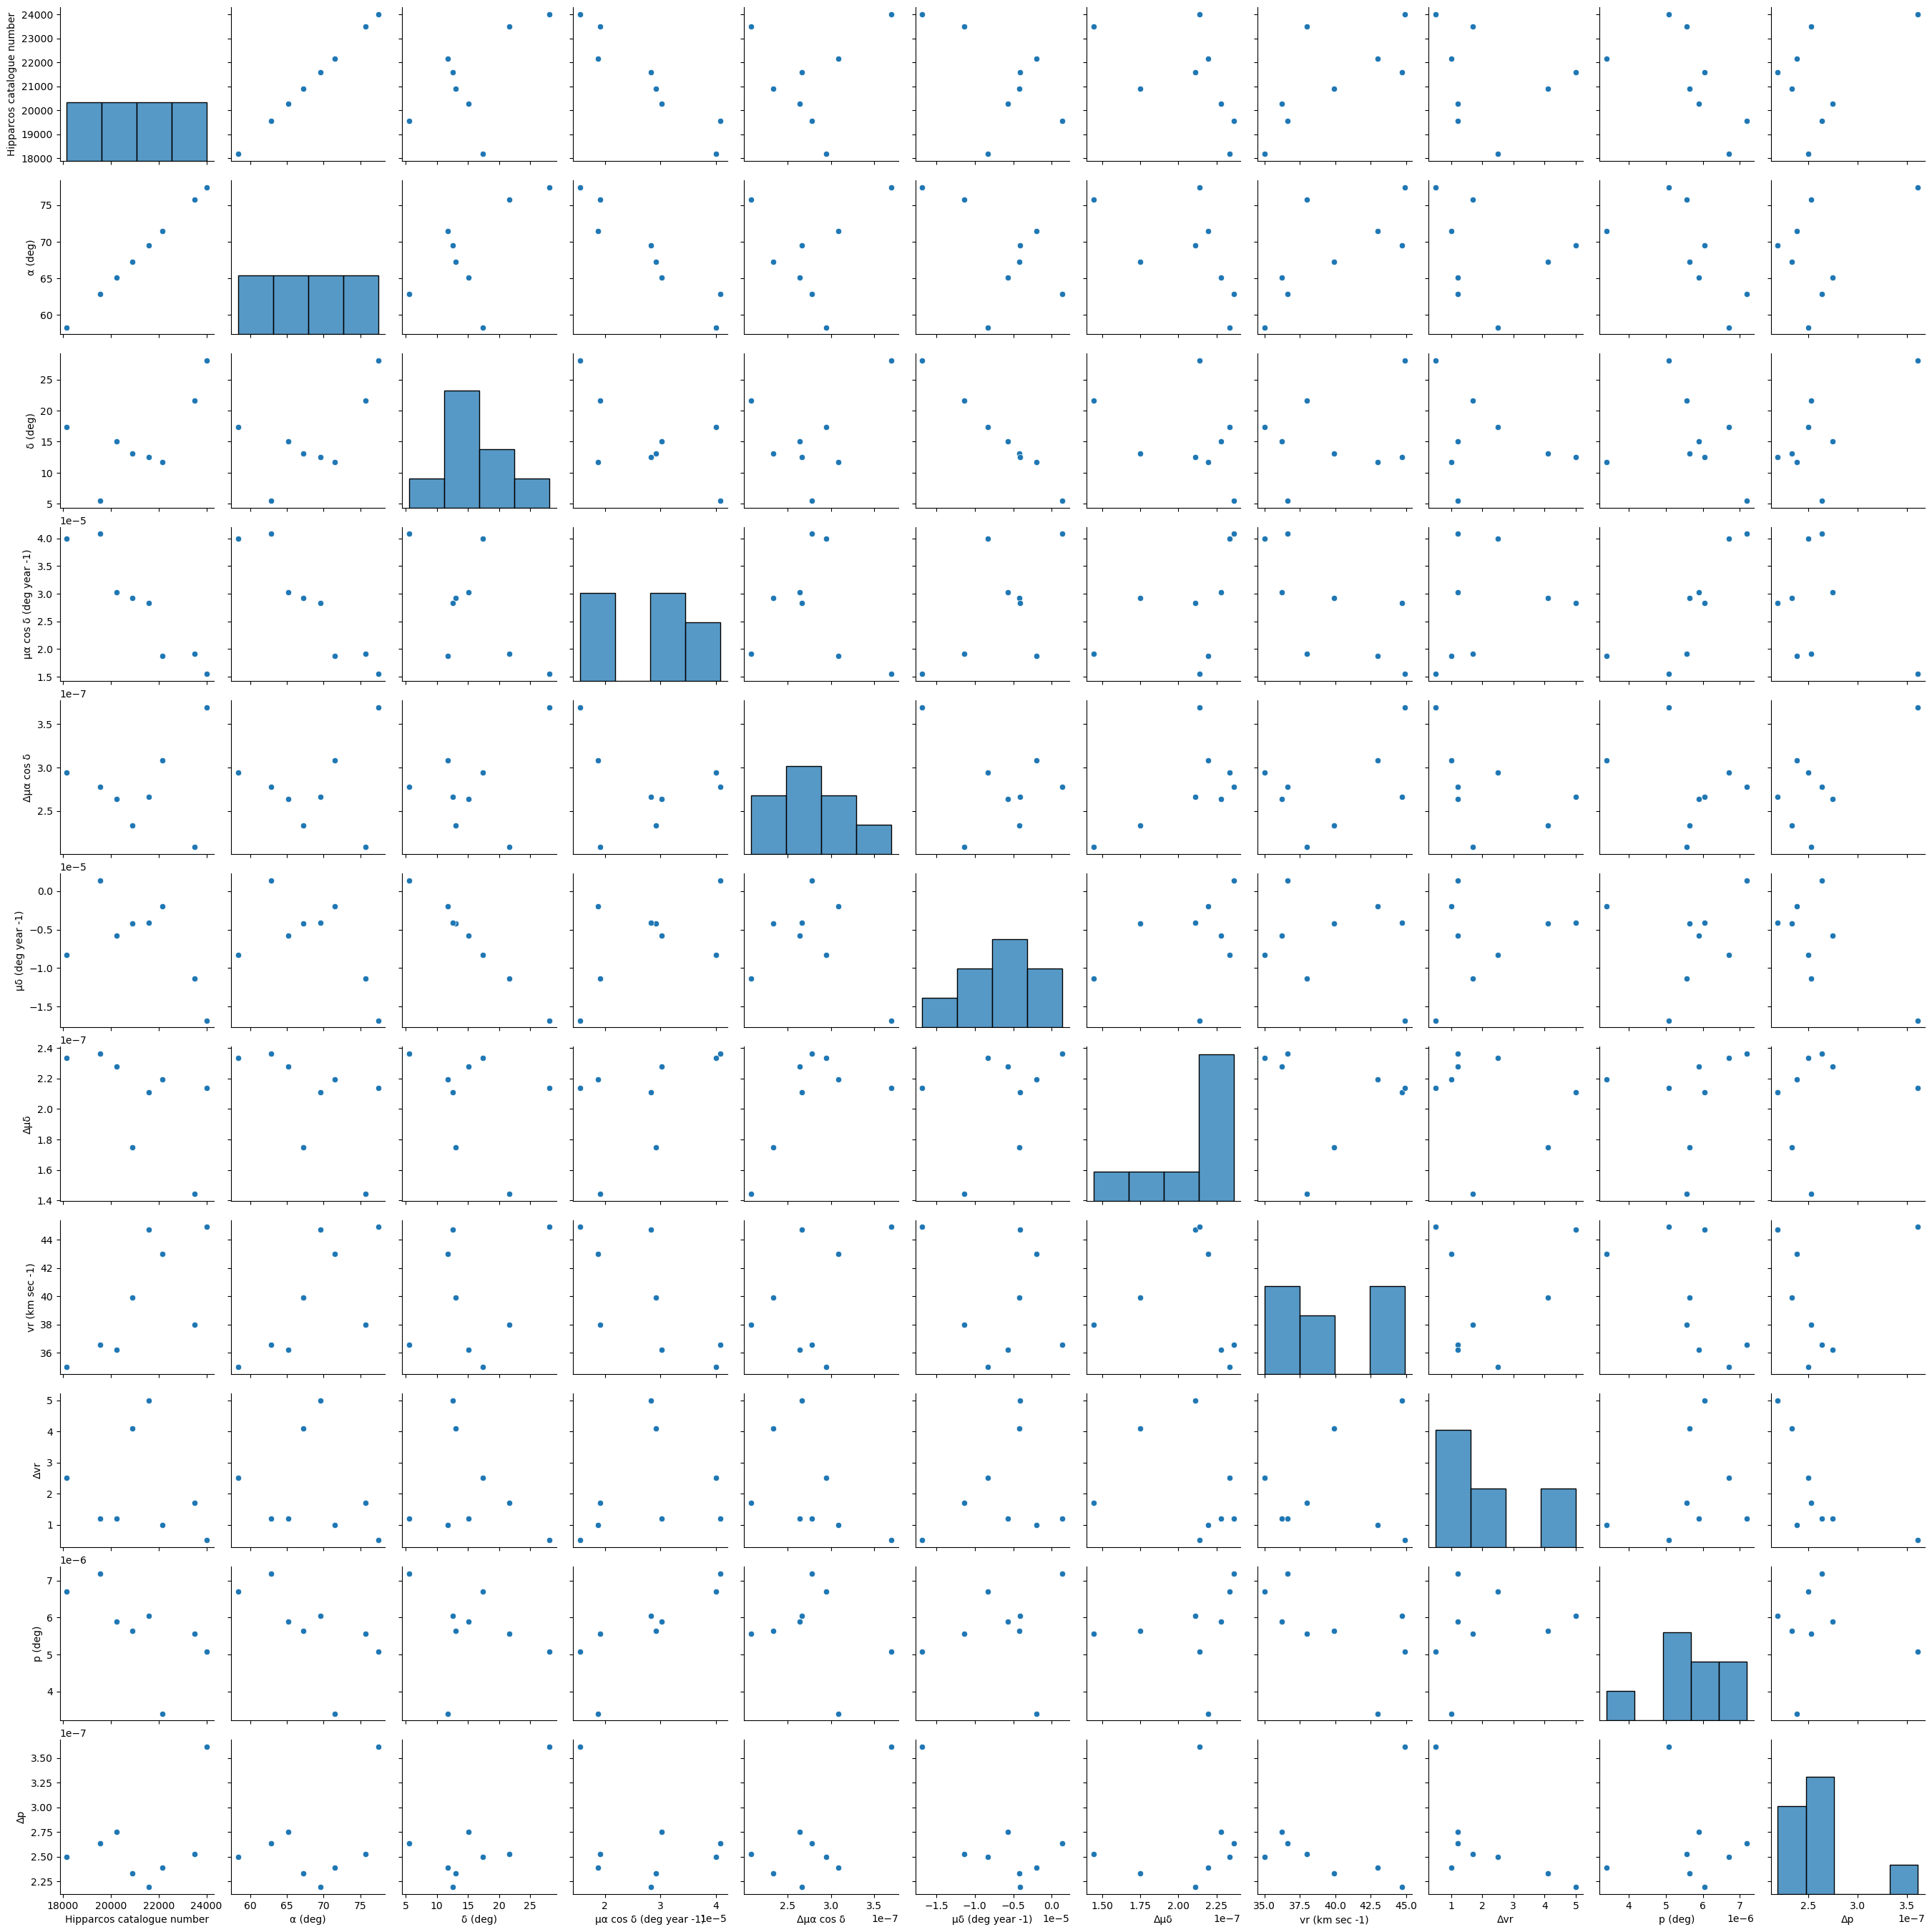

In [11]:
#pair Ploting 
sns.pairplot(df)
plt.show()

In [12]:
# Define time steps from 100,000 to 1,400,000 years
time_steps = range(100000, 1400001, 100000)

# Create a new DataFrame to store transposed data
transposed_data = []

for T in time_steps:
    new_row = {"T (years)": T}  # Initialize row with time step
    for idx, row in df.iterrows():
        hip_id = row["Hipparcos catalogue number"]
        new_row[f"{hip_id} α (deg)"] = row["α (deg)"] + (row["μα cos δ (deg year -1)"] * T)
        new_row[f"{hip_id} δ (deg)"] = row["δ (deg)"] + (row["μδ (deg year -1)"] * T)
    transposed_data.append(new_row)

# Convert list to DataFrame
df_transposed = pd.DataFrame(transposed_data)

# Set 'T (years)' as the index
df_transposed.set_index("T (years)", inplace=True)

df_transposed.columns = [col.replace(".0", "") for col in df_transposed.columns]

# Display the transposed DataFrame
df_transposed.head()


,18170 α (deg),18170 δ (deg),19554 α (deg),19554 δ (deg),20261 α (deg),20261 δ (deg),20901 α (deg),20901 δ (deg),21589 α (deg),21589 δ (deg),22157 α (deg),22157 δ (deg),23497 α (deg),23497 δ (deg),24019 α (deg),24019 δ (deg)
T (years),,,,,,,,,,,,,,,,
100000,62.290667,16.495778,66.913611,5.661917,68.172944,14.521333,70.130139,12.628750,72.365000,12.096972,73.381528,11.508667,77.68875,20.455333,78.989417,26.348111
200000,66.289833,15.664389,70.993056,5.800806,71.194889,13.947167,73.051528,12.209861,75.190833,11.683083,75.255972,11.311722,79.60375,19.320611,80.541083,24.665611
300000,70.289000,14.833000,75.072500,5.939694,74.216833,13.373000,75.972917,11.790972,78.016667,11.269194,77.130417,11.114778,81.51875,18.185889,82.092750,22.983111
400000,74.288167,14.001611,79.151944,6.078583,77.238778,12.798833,78.894306,11.372083,80.842500,10.855306,79.004861,10.917833,83.43375,17.051167,83.644417,21.300611
500000,78.287333,13.170222,83.231389,6.217472,80.260722,12.224667,81.815694,10.953194,83.668333,10.441417,80.879306,10.720889,85.34875,15.916444,85.196083,19.618111


#### Plotting:

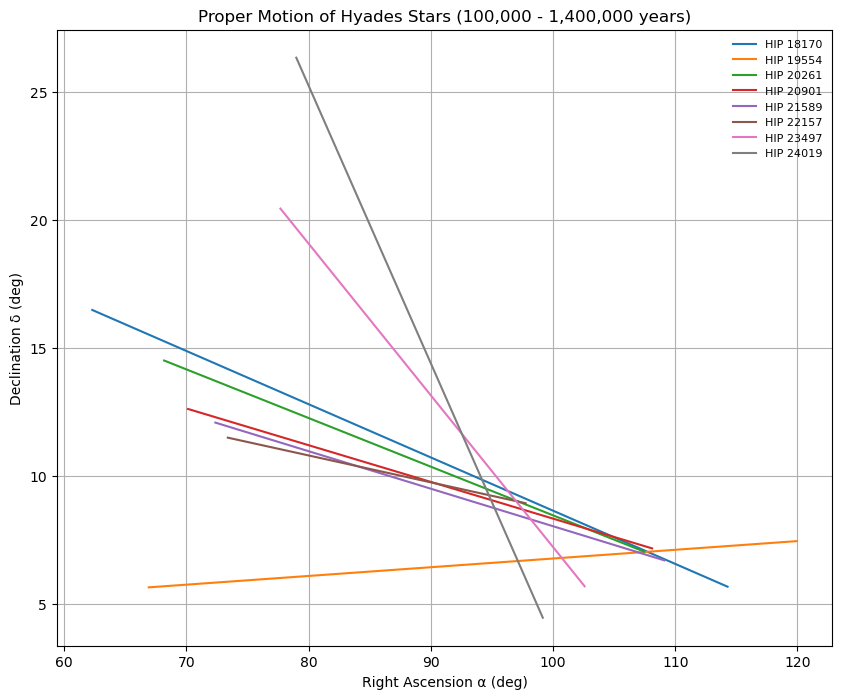

In [14]:
# Plot trajectories of stars
plt.figure(figsize=(10, 8))

for hip_id in df["Hipparcos catalogue number"]:
    hip_id_str = f"{hip_id:.1f}"  # Ensure the .0 is included    
    plt.plot(df_transposed[f"{hip_id} α (deg)"], df_transposed[f"{hip_id} δ (deg)"], label=f"HIP {hip_id}")

# Formatting the plot
plt.xlabel("Right Ascension α (deg)")
plt.ylabel("Declination δ (deg)")
plt.title("Proper Motion of Hyades Stars (100,000 - 1,400,000 years)")
plt.legend(loc="upper right", fontsize=8, frameon=False)
plt.grid(True)
plt.show()

#### Errors Estimation: 

In [16]:
# Perryman Estimations
αC_P = 96.6
δC_P = 5.8

# Estimate convergence point as the mean of the final positions
αC = df_transposed.iloc[-1, ::2].mean()  # Mean of final α values
δC = df_transposed.iloc[-1, 1::2].mean()  # Mean of final δ values

# Estimate uncertainties (spread of values)
ΔαC = df_transposed.iloc[-1, ::2].std()  
ΔδC = df_transposed.iloc[-1, 1::2].std()  

print(f"Convergence Point (αC, δC): ({αC:.2f}, {δC:.2f}) degrees")
print(f"Uncertainty (ΔαC, ΔδC): (±{ΔαC:.2f}, ±{ΔδC:.2f}) degrees")

print(f"Error(α) ≈ {αC/αC_P:.2f} %")
print(f"Error(δ) ≈ {δC/δC_P:.2f} %")

Convergence Point (αC, δC): (107.30, 6.65) degrees
Uncertainty (ΔαC, ΔδC): (±7.49, ±1.36) degrees
Error(α) ≈ 1.11 %
Error(δ) ≈ 1.15 %


#### Detailed plotting for better visulatization:

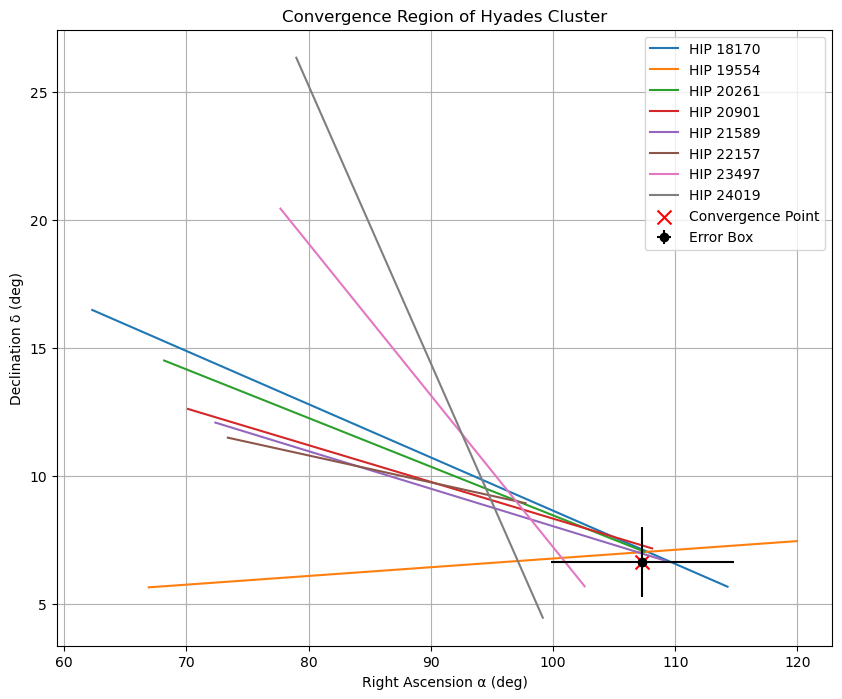

In [18]:
# Plot stars' motion again
plt.figure(figsize=(10, 8))

for hip_id in df["Hipparcos catalogue number"]:
    plt.plot(df_transposed[f"{hip_id} α (deg)"], df_transposed[f"{hip_id} δ (deg)"], label=f"HIP {hip_id}")

# Plot convergence point
plt.scatter(αC, δC, color="red", marker="x", s=100, label="Convergence Point")

# Plot error box
plt.errorbar(αC, δC, xerr=ΔαC, yerr=ΔδC, fmt="o", color="black", label="Error Box")

# Formatting
plt.xlabel("Right Ascension α (deg)")
plt.ylabel("Declination δ (deg)")
plt.title("Convergence Region of Hyades Cluster")
plt.legend()
plt.grid(True)
plt.show()

### Descriptive statistics on Intersection points:

In [20]:
# Extract final intersection points (last row of df_transposed)
intersection_x = df_transposed.iloc[-1, ::2]  # Final α values (Right Ascension)
intersection_y = df_transposed.iloc[-1, 1::2]  # Final δ values (Declination)

# Compute descriptive statistics
stats_dict = {
    "Statistic": ["N", "Total Sum", "Mean", "Standard Deviation", "Minimum", "Median", "Maximum"],
    "Intersection X (α)": [
        len(intersection_x), intersection_x.sum(), intersection_x.mean(),
        intersection_x.std(), intersection_x.min(), intersection_x.median(), intersection_x.max()
    ],
    "Intersection Y (δ)": [
        len(intersection_y), intersection_y.sum(), intersection_y.mean(),
        intersection_y.std(), intersection_y.min(), intersection_y.median(), intersection_y.max()
    ]
}

# Convert to DataFrame and transpose
df_stats = pd.DataFrame(stats_dict).set_index("Statistic").T  

# Display the transposed results
df_stats

Statistic,N,Total Sum,Mean,Standard Deviation,Minimum,Median,Maximum
Intersection X (α),8.0,858.387611,107.298451,7.485903,97.749306,107.783208,119.946389
Intersection Y (δ),8.0,53.239917,6.654990,1.360363,4.475611,6.886792,8.948389


### Intersection points Visualization (Plotting):

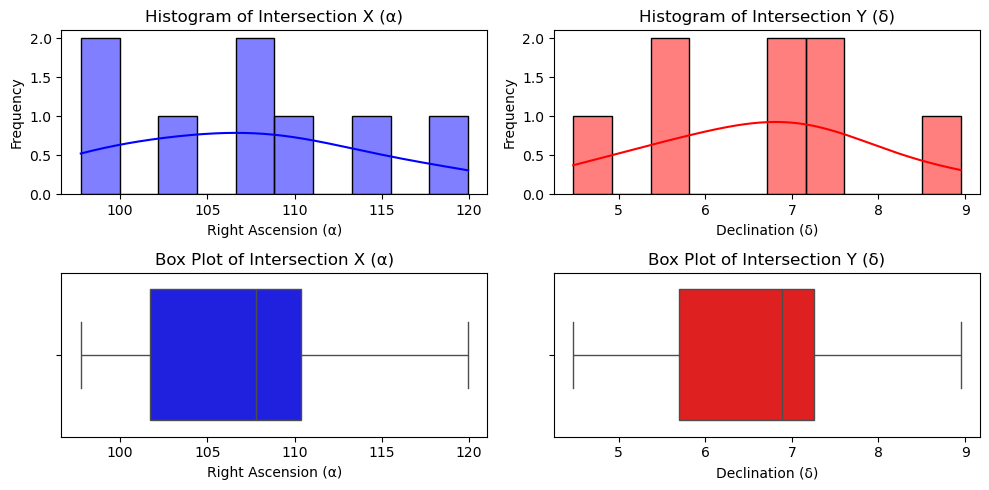

In [22]:
# Create a figure with two rows (Histogram + Box Plot)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Histogram for Intersection X
sns.histplot(intersection_x, bins=10, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Histogram of Intersection X (α)")
axes[0, 0].set_xlabel("Right Ascension (α)")
axes[0, 0].set_ylabel("Frequency")

# Histogram for Intersection Y
sns.histplot(intersection_y, bins=10, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title("Histogram of Intersection Y (δ)")
axes[0, 1].set_xlabel("Declination (δ)")
axes[0, 1].set_ylabel("Frequency")

# Box plot for Intersection X
sns.boxplot(x=intersection_x, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Box Plot of Intersection X (α)")
axes[1, 0].set_xlabel("Right Ascension (α)")

# Box plot for Intersection Y
sns.boxplot(x=intersection_y, ax=axes[1, 1], color='red')
axes[1, 1].set_title("Box Plot of Intersection Y (δ)")
axes[1, 1].set_xlabel("Declination (δ)")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

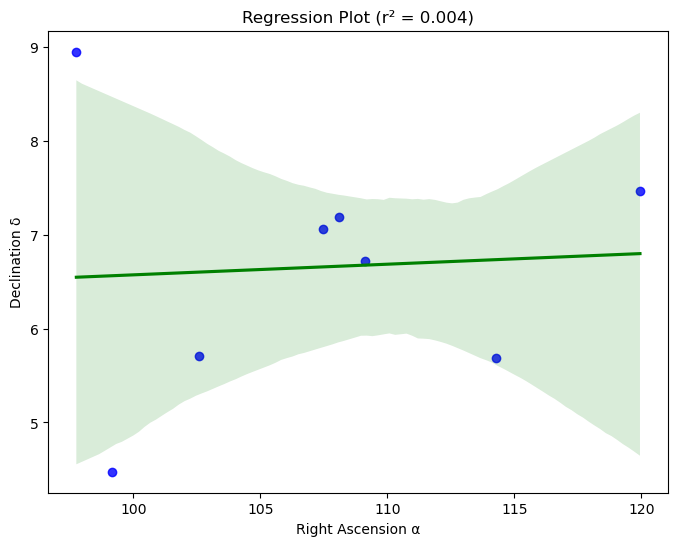

In [23]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(intersection_x, intersection_y)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Regression plot (X vs Y)
sns.regplot(x=intersection_x, y=intersection_y, scatter_kws={"color": "blue"}, line_kws={"color": "green"}, ax=ax)

# Labels and title
ax.set_xlabel("Right Ascension α")
ax.set_ylabel("Declination δ")
ax.set_title(f"Regression Plot (r² = {r_value**2:.3f})")

# Show the plot
plt.show()

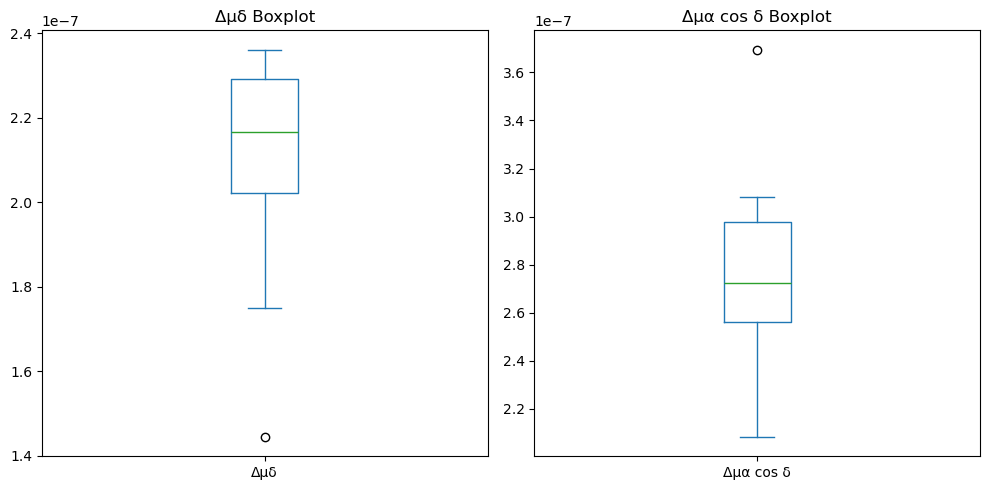

In [24]:
# Create a figure with two rows (2 Box Plots)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Box plots
df["Δμδ"].plot(kind='box', ax=axes[0], title="Δμδ Boxplot")
df["Δμα cos δ"].plot(kind='box', ax=axes[1], title="Δμα cos δ Boxplot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Task (a) Summary:
\begin{array}{lcl}
\text{Convergence Points by Perryman et al. (1998)} & (\alpha_{C_P}, \delta_{C_P}) & = (96.6, 5.8) \text{ degrees} \\[1em]
\text{Convergence Point by this analysis} & (\alpha_C, \delta_C) & = (107.30, 6.65) \text{ degrees} \\[1em]
\text{Uncertainty} & (\Delta \alpha_C, \Delta \delta_C) & = (\pm 7.49, \pm 1.36) \text{ degrees} \\[1em]
\text{Error} (\alpha) & \approx 1.11\% \\[1em]
\text{Error} (\delta) & \approx 1.15\%
\end{array}

## (b) Determination of the velocity vectors and distances to the Hyades

### Computing Main Attributes:

#### Computing the angle between the star's position and the direction to the convergence point (θ):

$$
\cos\theta = \sin\delta \sin\delta_C + \cos\delta \cos\delta_C \cos(\alpha - \alpha_C)
$$

In [29]:
# Convert degrees to radians
df["α (rad)"] = np.radians(df["α (deg)"])
df["δ (rad)"] = np.radians(df["δ (deg)"])
αC_rad = np.radians(αC)
δC_rad = np.radians(δC)

# Compute cos(θ)
df["cos(θ)"] = (np.sin(df["δ (rad)"]) * np.sin(δC_rad) + 
                   (np.cos(df["δ (rad)"]) * np.cos(δC_rad)) * 
                   (np.cos(df["α (rad)"] - αC_rad)))
# Compute θ in rad
df["θ (rad)"] = np.arccos(df["cos(θ)"])
# Compute θ in degrees
df["θ"] = np.degrees(np.arccos(df["cos(θ)"]))

# Compute tan(θ)
df["tan(θ)"] = np.tan((df["θ (rad)"]))

In [30]:
# Display the updated DataFrame
df[["Hipparcos catalogue number", "α (deg)", "δ (deg)", "θ", "θ (rad)", "cos(θ)","tan(θ)"]].head()

,Hipparcos catalogue number,α (deg),δ (deg),θ,θ (rad),cos(θ),tan(θ)
0,18170,58.291500,17.327167,48.966856,0.854633,0.656495,1.149025
1,19554,62.834167,5.523028,44.213899,0.771678,0.716741,0.972930
2,20261,65.151000,15.095500,42.166764,0.735949,0.741194,0.905688
3,20901,67.208750,13.047639,39.965817,0.697535,0.766428,0.838083
4,21589,69.539167,12.510861,37.653274,0.657174,0.791722,0.771586


#### Computing total proper motion (μ_t):

\begin{array}{lcl}
\mu_t = \sqrt{ (\mu_{\alpha} \cos\delta)^2 + \mu_{\delta}^2 }
\end{array}

In [32]:
# Compute total proper motion in deg/year
df["μt (deg year -1)"] = np.sqrt(df["μα cos δ (deg year -1)"]**2 + df["μδ (deg year -1)"]**2)

# Convert proper motion to arcsec/year (1 degree = 3600 arcsec)
df["μt (arcsec year -1)"] = df["μt (deg year -1)"] * 3600

In [33]:
# Display results
df[["Hipparcos catalogue number", "μt (deg year -1)", "μt (arcsec year -1)"]].head()

,Hipparcos catalogue number,μt (deg year -1),μt (arcsec year -1)
0,18170,0.000041,0.147048
1,19554,0.000041,0.146945
2,20261,0.000031,0.110736
3,20901,0.000030,0.106246
4,21589,0.000029,0.102815


#### Computing uncertainty in θ: 

\begin{array}{lcl}
\Delta \theta = \sqrt{ (\Delta \alpha)^2 + (\Delta \delta)^2 }
\end{array}

In [35]:
# uncertainty in θ
Δθ = np.radians(np.sqrt((ΔαC)**2 + (ΔδC)**2))

#### Computing uncertainty in μ_t: 

\begin{array}{lcl}
\Delta \mu_t = \sqrt{ (\Delta \mu_{\alpha} \cos\delta )^2 + (\Delta \mu_{\delta})^2 }
\end{array}

In [37]:
#error in μt 
df["Δμt (arcsec year -1)"] = np.sqrt((df["Δμα cos δ"]*3600)**2 + (df["Δμδ"]/3600)**2)

#### Computing distance d in parsecs: 

$$
d = \frac{v_r \tan\theta}{4.74047 \mu}
$$

In [39]:
# Compute distance d in parsecs
df["p (arcsec)"] = df["p (deg)"] * 3600  # Convert parallax from degrees to arcseconds
df["Δp"] *= 3600

# Compute distance in parsecs
df["d_msc (parsec)"] = df["vr (km sec -1)"] * df["tan(θ)"] / (4.74047 * df["μt (arcsec year -1)"])

df[["Hipparcos catalogue number", "vr (km sec -1)", "θ", "d_msc (parsec)"]].head()

,Hipparcos catalogue number,vr (km sec -1),θ,d_msc (parsec)
0,18170,35.0,48.966856,57.692133
1,19554,36.6,44.213899,51.119432
2,20261,36.2,42.166764,62.456281
3,20901,39.9,39.965817,66.393822
4,21589,44.7,37.653274,70.763996


#### Computing Velocities V:

$$
v_t = v_r \tan\theta
$$

$$
v = \sqrt{v_t^2 + v_r^2}
$$


In [41]:
# Compute vt
df["vt (km sec -1)"] = df["vr (km sec -1)"] * df["tan(θ)"]

# Compute total velocity
df["v (km sec -1)"] = np.sqrt(df["vt (km sec -1)"]**2 + df["vr (km sec -1)"]**2)

In [42]:
# Display results
df[["Hipparcos catalogue number", "vt (km sec -1)", "v (km sec -1)"]].head()

,Hipparcos catalogue number,vt (km sec -1),v (km sec -1)
0,18170,40.215886,53.313389
1,19554,35.609223,51.064438
2,20261,32.785912,48.840107
3,20901,33.439531,52.059699
4,21589,34.489893,56.459213


### Computing Uncertanities:

#### Computing uncertainty in v:
$$
\Delta d_v = \left| \frac{\tan\theta}{4.74047 \mu} \right| \Delta v_r
$$

In [45]:
# Compute Δdv
df["Δdv"] = np.abs(df["tan(θ)"] / (4.74047 * df["μt (arcsec year -1)"])) * df["Δvr"] 

#### Computing uncertainty in θ:
$$
\Delta d_{\theta} = \left| \frac{v_r (1 + \tan^2 \theta)}{4.74047 \mu_t} \right| \Delta \theta
$$

In [47]:
# Compute Δdθ
df["Δdθ"] = np.abs(df["vr (km sec -1)"] * (1 + df["tan(θ)"]**2)) / (4.74047 * df["μt (arcsec year -1)"]) * Δθ

#### Computing uncertainty in μ_t:

$$
\Delta d_{\mu} = \left| \frac{v_r \tan\theta}{4.74047 \mu_t^2} \right| \Delta \mu_t
$$

In [49]:
# Compute contributions to Δdμ
df["Δdμ"] = np.abs(df["vr (km sec -1)"] * df["tan(θ)"] / (4.74047 * df["μt (arcsec year -1)"]**2)) * df["Δμt (arcsec year -1)"]

#### Computing uncertainty in d:

$$
\Delta d = \sqrt{\Delta d_v^2 + \Delta d_{\theta}^2 + \Delta d_{\mu}^2}
$$

In [51]:
# Compute total uncertainty in distance
df["Δd_msc"] = np.sqrt(df["Δdv"]**2 + df["Δdθ"]**2 + df["Δdμ"]**2)

In [52]:
# Display results
df[["Hipparcos catalogue number", "Δdv", "Δdθ","Δdμ", "Δd_msc", "d_msc (parsec)"]].head()

,Hipparcos catalogue number,Δdv,Δdθ,Δdμ,Δd_msc,d_msc (parsec)
0,18170,4.120867,15.470349,0.415875,16.015186,57.692133
1,19554,1.676047,13.581763,0.347881,13.689209,51.119432
2,20261,2.070374,16.669021,0.535809,16.805648,62.456281
3,20901,6.822423,17.909131,0.524923,19.171801,66.393822
4,21589,7.915436,19.429393,0.660732,20.990283,70.763996


#### Computing the percentage uncertainty in distance:

In [54]:
#100Δd/d
df["Δd_msc%"] = 100 * df["Δd_msc"]/df["d_msc (parsec)"]
df[["Δd_msc%"]].head()

,Δd_msc%
0,27.759740
1,26.778875
2,26.907859
3,28.875881
4,29.662377


In [55]:
#averages in errors
print(f"the average uncertainty in velocity ≈ {df["Δdv"].mean():.2f} %")
print(f"the average uncertainty in angle ≈ {df["Δdθ"].mean():.2f} %")
print(f"the average uncertainty in total proper motiom ≈ {df["Δdμ"].mean():.2f} %")
print(f"the average uncertainty in distance ≈ {df["Δd_msc"].mean():.2f} %")

the average uncertainty in velocity ≈ 3.59 %
the average uncertainty in angle ≈ 19.03 %
the average uncertainty in total proper motiom ≈ 0.75 %
the average uncertainty in distance ≈ 19.54 %


In [56]:
#average (moving cluster parallax)
print(f"the percentage uncertainty in distance ≈ {df["Δd_msc%"].mean():.2f} %")

the percentage uncertainty in distance ≈ 28.17 %


## Task (b) Summary:


\begin{array}{lcl}
\Delta d_v \% & \approx 3.59\% \\[1em]
\Delta d_{\theta} \% & \approx 19.03\% \\[1em]
\Delta d_{\mu_t} \% & \approx 0.75\% \\[1em]
\Delta d \% & \approx 19.54\% \\[1em]
\frac{\Delta d}{d} * 100\% & \approx 28.17\%
\end{array}



## (c) Comparison of moving-cluster-parallax and trigonometric-parallax distances

#### Distance by trigonometric parallax:
$$
d = \frac{1}{p} 
$$

In [60]:
#distance by trigonometric parallax
df["d_TP"] = 1/df["p (arcsec)"]

#### Uncertainty in Δd:

$$
\left| \Delta d \right| = \frac{\Delta p}{p^2} = d \frac{\Delta p}{p}
$$

In [62]:
#uncertainty Δd
df["Δd_TP"] = df["Δp"] * df["d_TP"] / df["p (arcsec)"]

#### Computing the percentage uncertainty in distance:

In [64]:
#100Δd/d
df["Δd_TP%"] = 100 * df["Δd_TP"]/df["d_TP"]
df[["Δd_TP%"]].head()

,Δd_TP%
0,3.728252
1,3.669370
2,4.669811
3,4.131825
4,3.625516


In [65]:
#average (moving Trig parallax)
print(f"the percentage uncertainty in distance ≈ {df["Δd_TP%"].mean():.2f} %")

the percentage uncertainty in distance ≈ 4.81 %


#### Display the Distances results via both manners:

In [67]:
# Display results
df[["Hipparcos catalogue number", "d_TP","Δd_TP", "Δd_TP%", "d_msc (parsec)", "Δd_msc", "Δd_msc%"]].head()

,Hipparcos catalogue number,d_TP,Δd_TP,Δd_TP%,d_msc (parsec),Δd_msc,Δd_msc%
0,18170,41.425021,1.544429,3.728252,57.692133,16.015186,27.759740
1,19554,38.624952,1.417293,3.669370,51.119432,13.689209,26.778875
2,20261,47.169811,2.202741,4.669811,62.456281,16.805648,26.907859
3,20901,49.188392,2.032378,4.131825,66.393822,19.171801,28.875881
4,21589,45.892611,1.663844,3.625516,70.763996,20.990283,29.662377


### Ploting Methods data:

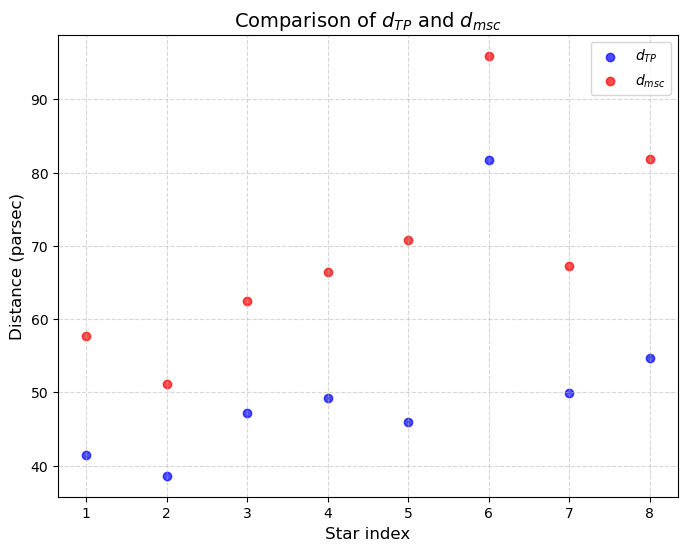

In [69]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot d_TP and d_msc (parsec)
ax.scatter(df.index +1, df["d_TP"], label=r"$d_{TP}$", color="blue", alpha=0.7)
ax.scatter(df.index +1, df["d_msc (parsec)"], label=r"$d_{msc}$", color="red", alpha=0.7)

# Labels and title
ax.set_xlabel("Star index", fontsize=12)
ax.set_ylabel("Distance (parsec)", fontsize=12)
ax.set_title("Comparison of $d_{TP}$ and $d_{msc}$", fontsize=14)

# Grid and legend
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Show the plot
plt.show()

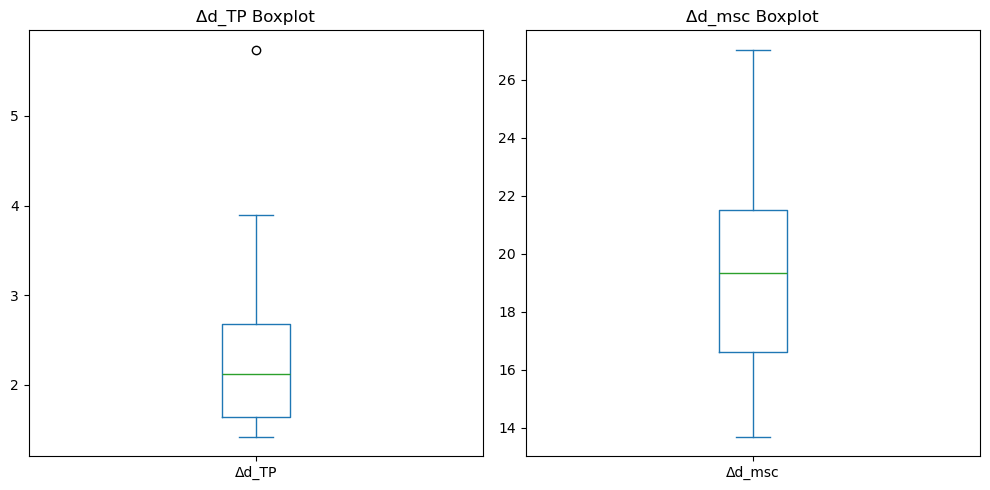

In [70]:
# Create a figure with two rows (2 Box Plots)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Box plots
df["Δd_TP"].plot(kind='box', ax=axes[0], title="Δd_TP Boxplot")
df["Δd_msc"].plot(kind='box', ax=axes[1], title="Δd_msc Boxplot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Descriptive statistics on results of methods:

In [72]:
# Compute descriptive statistics for the selected columns
stats_dict = {
    "Statistic": ["N", "Total Sum", "Mean", "Standard Deviation", "Minimum", "Median", "Maximum"],
    "d_TP (parsec)": [
        len(df["d_TP"]), df["d_TP"].sum(), df["d_TP"].mean(),
        df["d_TP"].std(), df["d_TP"].min(), df["d_TP"].median(), df["d_TP"].max()
    ],
    "Δd_TP": [
        len(df["Δd_TP"]), df["Δd_TP"].sum(), df["Δd_TP"].mean(),
        df["Δd_TP"].std(), df["Δd_TP"].min(), df["Δd_TP"].median(), df["Δd_TP"].max()
    ],
    "Δd_TP%": [
        len(df["Δd_TP%"]), df["Δd_TP%"].sum(), df["Δd_TP%"].mean(),
        df["Δd_TP%"].std(), df["Δd_TP%"].min(), df["Δd_TP%"].median(), df["Δd_TP%"].max()
    ],
    "d_msc (parsec)": [
        len(df["d_msc (parsec)"]), df["d_msc (parsec)"].sum(), df["d_msc (parsec)"].mean(),
        df["d_msc (parsec)"].std(), df["d_msc (parsec)"].min(), df["d_msc (parsec)"].median(), df["d_msc (parsec)"].max()
    ],
    "Δd_msc": [
        len(df["Δd_msc"]), df["Δd_msc"].sum(), df["Δd_msc"].mean(),
        df["Δd_msc"].std(), df["Δd_msc"].min(), df["Δd_msc"].median(), df["Δd_msc"].max()
    ],
    "Δd_msc%": [
        len(df["Δd_msc%"]), df["Δd_msc%"].sum(), df["Δd_msc%"].mean(),
        df["Δd_msc%"].std(), df["Δd_msc%"].min(), df["Δd_msc%"].median(), df["Δd_msc%"].max()
    ]
}

# Convert to DataFrame and transpose
df_stats = pd.DataFrame(stats_dict).set_index("Statistic").T  

# Display the transposed results
df_stats

Statistic,N,Total Sum,Mean,Standard Deviation,Minimum,Median,Maximum
d_TP (parsec),8.0,408.679741,51.084968,13.341806,38.624952,48.179101,81.699346
Δd_TP,8.0,20.764096,2.595512,1.488191,1.417293,2.117560,5.740314
Δd_TP%,8.0,38.510242,4.813780,1.445738,3.625516,4.339776,7.111597
d_msc (parsec),8.0,553.397180,69.174647,14.103424,51.119432,66.819780,95.938806
Δd_msc,8.0,156.283738,19.535467,4.222900,13.689209,19.350925,27.033448
Δd_msc%,8.0,225.386007,28.173251,1.013049,26.778875,28.179234,29.662377


#### Required comparing parameter:

In [74]:
# Ratio betwween both percentage uncertanities
print(f"Ratio of percentage uncertanities (Avg) ≈ {(df["Δd_TP%"].mean() / df["Δd_msc%"].mean()):.2f} %")
print(f"Ratio of percentage (std) ≈ {(df["Δd_TP%"].std() / df["Δd_msc%"].std()):.2f} %")

Ratio of percentage uncertanities (Avg) ≈ 0.17 %
Ratio of percentage (std) ≈ 1.43 %


#### Error Propagation Plot:

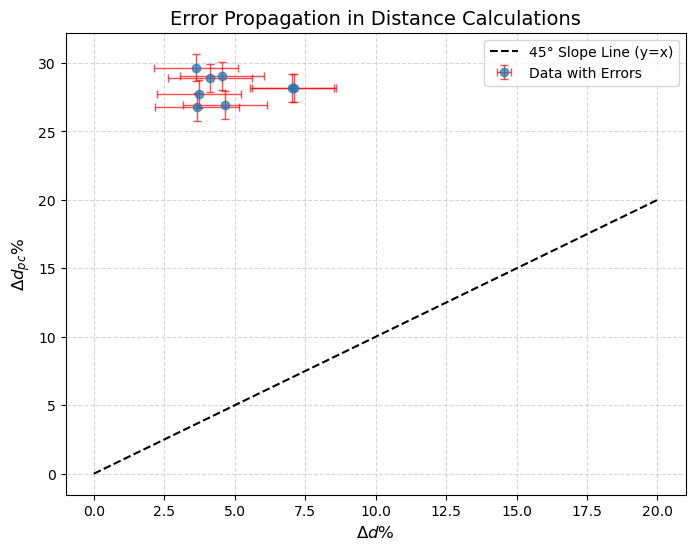

In [76]:
# Define x, y, and their standard deviation as errors
y = df['Δd_msc%']
x = df['Δd_TP%']

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with error bars using standard deviation
ax.errorbar(x, y, xerr=df['Δd_TP'].std(), yerr=df['Δd_msc%'].std(), fmt='o', 
            ecolor='red', elinewidth=1, capsize=3, capthick=1, 
            alpha=0.7, label='Data with Errors')

# Overlay a 45° slope line (y = x)
x_vals = np.linspace(0, 20, 20)  # Generate x values for the line
ax.plot(x_vals, x_vals, 'k--', linewidth=1.5, label='45° Slope Line (y=x)')  # Dashed black line

# Labels and title
ax.set_ylabel(r'$\Delta d_{pc} \%$', fontsize=12)
ax.set_xlabel(r'$\Delta d \%$', fontsize=12)
ax.set_title('Error Propagation in Distance Calculations', fontsize=14)

# Formatting
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.show()


## Task (C) Pre-Summary:   

\begin{array}{lcl}
\text{Percentage Uncertainty in Distance (Avg)} & & \approx 4.81\% \\[1em]
\text{Ratio of Percentage Uncertainties} & & \approx 0.17\% \\[1em]
\text{Ratio of Percentage of Standard Deviations} & & \approx 1.43\%
\end{array}

## Calculating the appropriate averages the distance and speed of the center of mass of the Hyades 

In [79]:
# data with Perryman et al. (1998)
perryman_d = 46.34
perryman_d_uncertainty = 0.27
perryman_v = 41.1
perryman_v_uncertainty = 0.2

### Equations for Center of Mass Calculations

#### **1. Center of Mass Distance (d_CM)** 
The mean distance of the stars in our sample is given by:  
$$
d_{\text{CM}} = \frac{1}{N} \sum_{i=1}^{N} d_i
$$
where:  
- $ d_i $ is the distance of the \(i\)-th star,  
- $ N $ is the total number of stars.

#### **2. Uncertainty in (d_CM) (Standard Error of the Mean)**  
$$
\sigma_{d_{\text{CM}}} = \frac{\sigma_d}{\sqrt{N}}
$$
where:  
- $ \sigma_d $ is the standard deviation of distances,  
- $ N $ is the number of stars.

#### **3. Center of Mass Velocity (v_CM)**  
$$
v_{\text{CM}} = \frac{1}{N} \sum_{i=1}^{N} v_i
$$
where:  
- $ v_i $ is the total velocity of the $i$-th star.

#### **4. Uncertainty in (v_CM) (Standard Error of the Mean)**  
$$
\sigma_{v_{\text{CM}}} = \frac{\sigma_v}{\sqrt{N}}
$$
where:  
- $ \sigma_v $ is the standard deviation of velocities.

In [82]:
# Number of stars
N = len(df)  

# Compute center of mass distance and its uncertainty
d_CM = df["d_TP"].mean()
d_CM_uncertainty = df["d_TP"].std() / np.sqrt(N)

# Compute center of mass velocity and its uncertainty
v_CM = df["v (km sec -1)"].mean()
v_CM_uncertainty = df["v (km sec -1)"].std() / np.sqrt(N)

In [83]:
# Display results of Distance
print(f"Computed Center of Mass Distance: {d_CM:.2f} ± {d_CM_uncertainty:.2f} parsecs")
print(f"Perryman et al. (1998) Distance: {perryman_d} ± {perryman_d_uncertainty} parsecs")

Computed Center of Mass Distance: 51.08 ± 4.72 parsecs
Perryman et al. (1998) Distance: 46.34 ± 0.27 parsecs


In [84]:
# Display results of Velocity
print(f"Computed Center of Mass Velocity: {v_CM:.2f} ± {v_CM_uncertainty:.2f} km/s")
print(f"Perryman et al. (1998) Velocity: {perryman_v} ± {perryman_v_uncertainty} km/s")

Computed Center of Mass Velocity: 51.94 ± 1.21 km/s
Perryman et al. (1998) Velocity: 41.1 ± 0.2 km/s


#### **5. Relative Error (%)**  
$$
\text{Relative Error} = \left| \frac{\text{Computed Value} - \text{Reference Value}}{\text{Reference Value}} \right| \times 100\%
$$
This is computed for both distance and velocity:  
$$
\text{Relative Error in Distance} = \left| \frac{d_{\text{CM}} - d_{\text{Perryman}}}{d_{\text{Perryman}}} \right| \times 100\%
$$
$$
\text{Relative Error in Velocity} = \left| \frac{v_{\text{CM}} - v_{\text{Perryman}}}{v_{\text{Perryman}}} \right| \times 100\%
$$
where:  
- $ d_{\text{Perryman}} $ and $ v_{\text{Perryman}} $ are the reference values from Perryman et al. (1998).

In [86]:
# Compute relative errors
relative_error_d = abs(d_CM - perryman_d) / perryman_d * 100
relative_error_v = abs(v_CM - perryman_v) / perryman_v * 100
print(f"Relative Error in Distance: {relative_error_d:.2f}%")
print(f"Relative Error in Velocity: {relative_error_v:.2f}%")

Relative Error in Distance: 10.24%
Relative Error in Velocity: 26.39%


## Calculations Summary:

\begin{array}{lcl}
\text{Perryman et al. (1998) Distance} & d_{\text{Perryman}} & = 46.34 \pm 0.27 \text{ parsecs} \\[1em]
\text{Perryman et al. (1998) Velocity} & v_{\text{Perryman}} & = 41.1 \pm 0.2 \text{ km/s} \\[1em]
\text{Computed Center of Mass Distance} & d_{\text{CM}} & = 51.08 \pm 4.72 \text{ parsecs} \\[1em]
\text{Computed Center of Mass Velocity} & v_{\text{CM}} & = 51.94 \pm 1.21 \text{ km/s} \\[1em]
\text{Relative Error in Distance} & & \approx 10.24\% \\[1em]
\text{Relative Error in Velocity} & & \approx 26.39\%
\end{array}
